In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
df = pd.read_csv('ecommerce_customers_unit1.csv')
df.head()

,customer_id,age,gender,country,signup_date,last_purchase_date,num_orders,total_spent,avg_order_value,recency_days,is_premium_member,device_type,preferred_category,churned
0,10001,56.0,Male,India,2022-01-27,2024-04-27,10,13273.25,1327.32,522,0,NaN,Home,0
1,10002,69.0,Other,UK,2025-01-12,2025-08-01,10,NaN,308.90,61,0,Mobile,Grocery,0
2,10003,46.0,Female,USA,2021-04-25,2021-06-01,5,3411.83,682.37,1583,0,NaN,NaN,0
3,10004,32.0,Male,India,2021-02-23,2023-09-22,5,4502.00,900.40,740,0,NaN,NaN,0
4,10005,60.0,Female,India,2021-06-07,2021-12-11,7,3842.10,548.87,1390,0,Tablet,Books,0


In [3]:
df.isnull()
print(df.isnull().sum())

customer_id            0
age                   28
gender                34
country               32
signup_date            0
last_purchase_date     0
num_orders             0
total_spent           34
avg_order_value        0
recency_days           0
is_premium_member      0
device_type           30
preferred_category    22
churned                0
dtype: int64


In [4]:
print("count of missing values :",df.isnull().sum().sum())

count of missing values : 180


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         605 non-null    int64  
 1   age                 577 non-null    float64
 2   gender              571 non-null    object 
 3   country             573 non-null    object 
 4   signup_date         605 non-null    object 
 5   last_purchase_date  605 non-null    object 
 6   num_orders          605 non-null    int64  
 7   total_spent         571 non-null    float64
 8   avg_order_value     605 non-null    float64
 9   recency_days        605 non-null    int64  
 10  is_premium_member   605 non-null    int64  
 11  device_type         575 non-null    object 
 12  preferred_category  583 non-null    object 
 13  churned             605 non-null    int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 66.3+ KB


In [6]:
df.describe()

,customer_id,age,num_orders,total_spent,avg_order_value,recency_days,is_premium_member,churned
count,605.000000,577.000000,605.000000,571.000000,605.000000,605.000000,605.000000,605.000000
mean,10301.439669,44.175043,5.945455,8059.212137,1279.377471,456.029752,0.294215,0.036364
std,173.636071,14.978765,2.332892,10346.781856,1123.841840,405.810389,0.456066,0.187348
min,10001.000000,18.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,10151.000000,32.000000,4.000000,3920.640000,795.780000,128.000000,0.000000,0.000000
50%,10302.000000,45.000000,6.000000,6533.980000,1152.530000,327.000000,0.000000,0.000000
75%,10451.000000,56.000000,7.000000,9523.010000,1615.030000,696.000000,1.000000,0.000000
max,10600.000000,69.000000,13.000000,123891.810000,11431.900000,1685.000000,1.000000,1.000000


In [7]:
df.shape

(605, 14)

In [8]:
missing_counts = df.isnull().sum().sort_values(ascending=False)
print(missing_counts)

gender                34
total_spent           34
country               32
device_type           30
age                   28
preferred_category    22
last_purchase_date     0
signup_date            0
customer_id            0
num_orders             0
recency_days           0
avg_order_value        0
is_premium_member      0
churned                0
dtype: int64


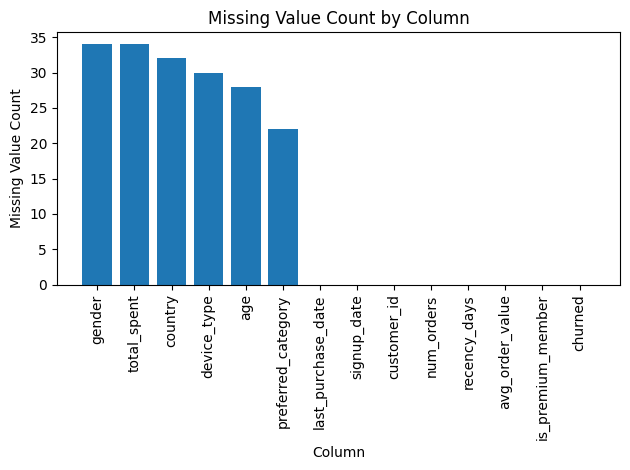

In [9]:
plt.bar(missing_counts.index, missing_counts.values)
plt.xlabel('Column')
plt.ylabel('Missing Value Count')
plt.title('Missing Value Count by Column')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

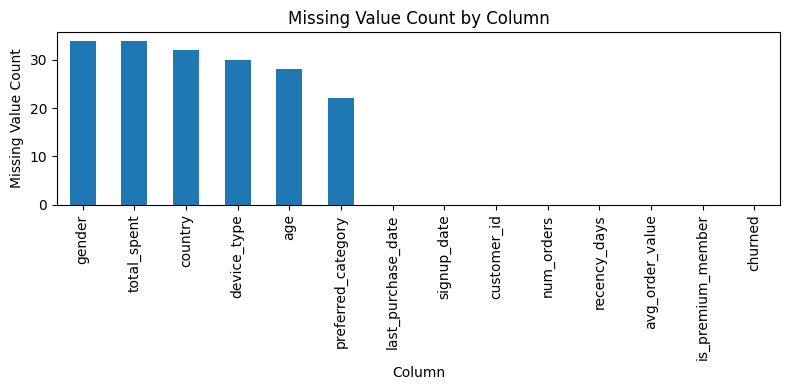

In [10]:
#plot missing count bar chart
plt.figure(figsize=(8,4))
missing_counts.plot(kind='bar')
plt.xlabel('Column')
plt.ylabel('Missing Value Count')
plt.title('Missing Value Count by Column')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [11]:
#handling missing values
df['age'] = df['age'].fillna(df['age'].mean())
print(df['age'])

0      56.0
1      69.0
2      46.0
3      32.0
4      60.0
       ... 
600    25.0
601    50.0
602    46.0
603    32.0
604    44.0
Name: age, Length: 605, dtype: float64


In [12]:
df.fillna(df.select_dtypes(include='number').mean(),inplace=True)
df.fillna(df.select_dtypes(include='object').mode().iloc[0],inplace=True)
print(df.isnull().sum())

customer_id           0
age                   0
gender                0
country               0
signup_date           0
last_purchase_date    0
num_orders            0
total_spent           0
avg_order_value       0
recency_days          0
is_premium_member     0
device_type           0
preferred_category    0
churned               0
dtype: int64


# Inter Quartile range

In [13]:
q1 = df['total_spent'].quantile(0.25)
q3 = df['total_spent'].quantile(0.75)
iqr = q3 - q1
print(iqr)

5279.35


Lb = q1 + (1.5*IQR)

---


Ub = q3 - (1.5*IQR)

In [14]:
lb = q1-(1.5*iqr)
ub = q3+(1.5*iqr)
print("Lower Bound:",lb)
print("upper Bound:",ub)

Lower Bound: -3838.5250000000005
upper Bound: 17278.875


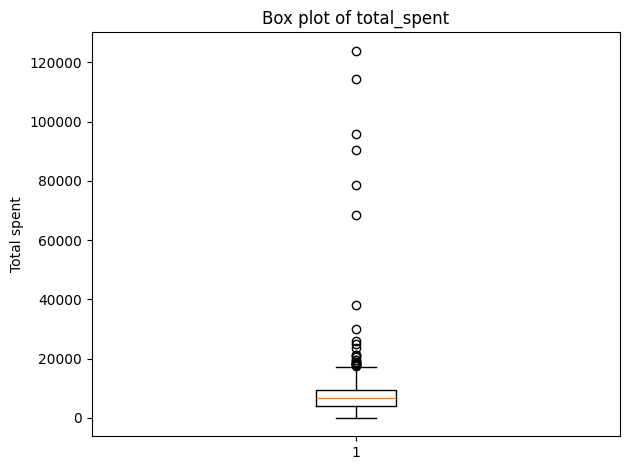

In [15]:
plt.boxplot(df['total_spent'])
plt.title("Box plot of total_spent")
plt.ylabel('Total spent')
plt.tight_layout()
plt.show()

In [16]:
nums_cols = df.select_dtypes(include='number').columns
print("Numeric columns:", nums_cols)
print("Numeric columns:", nums_cols.tolist())

Numeric columns: Index(['customer_id', 'age', 'num_orders', 'total_spent', 'avg_order_value',
       'recency_days', 'is_premium_member', 'churned'],
      dtype='object')
Numeric columns: ['customer_id', 'age', 'num_orders', 'total_spent', 'avg_order_value', 'recency_days', 'is_premium_member', 'churned']


In [17]:
#create a  scalar Object
normalizer = MinMaxScaler()
#fit and transform the data
#applying normalization
df_normalized = df.copy()
df_normalized[nums_cols] = normalizer.fit_transform(df[nums_cols])
print(df_normalized.head())

   customer_id       age  gender country signup_date last_purchase_date  \
0     0.000000  0.745098    Male   India  2022-01-27         2024-04-27   
1     0.001669  1.000000   Other      UK  2025-01-12         2025-08-01   
2     0.003339  0.549020  Female     USA  2021-04-25         2021-06-01   
3     0.005008  0.274510    Male   India  2021-02-23         2023-09-22   
4     0.006678  0.823529  Female   India  2021-06-07         2021-12-11   

   num_orders  total_spent  avg_order_value  recency_days  is_premium_member  \
0    0.769231     0.107136         0.116107      0.309382                0.0   
1    0.769231     0.065050         0.027021      0.035629                0.0   
2    0.384615     0.027539         0.059690      0.939430                0.0   
3    0.384615     0.036338         0.078762      0.438836                0.0   
4    0.538462     0.031012         0.048012      0.824822                0.0   

  device_type preferred_category  churned  
0      Mobile           

In [18]:
#standardization
std = StandardScaler()
df_std = df.copy()
df_std[nums_cols] = std.fit_transform(df[nums_cols])
print("Normalization values")
print(df_std.head())

#normalization
norm = MinMaxScaler()
df_norm = df.copy()
df_norm[nums_cols] = norm.fit_transform(df[nums_cols])
print("Standardization values")
print(df_norm.head())

Normalization values
   customer_id       age  gender country signup_date last_purchase_date  \
0    -1.731715  0.809077    Male   India  2022-01-27         2024-04-27   
1    -1.725952  1.698552   Other      UK  2025-01-12         2025-08-01   
2    -1.720188  0.124866  Female     USA  2021-04-25         2021-06-01   
3    -1.714424 -0.833031    Male   India  2021-02-23         2023-09-22   
4    -1.708660  1.082762  Female   India  2021-06-07         2021-12-11   

   num_orders   total_spent  avg_order_value  recency_days  is_premium_member  \
0    1.739429  5.191695e-01         0.042695      0.162699          -0.645648   
1    1.739429  1.811195e-16        -0.864250     -0.974240          -0.645648   
2   -0.405607 -4.627467e-01        -0.531660      2.779384          -0.645648   
3   -0.405607 -3.541969e-01        -0.337495      0.700340          -0.645648   
4    0.452408 -4.199041e-01        -0.650547      2.303399          -0.645648   

  device_type preferred_category   churne

In [19]:
#print results after scaling
print("Before scaling")
print(df[nums_cols].describe())
print(df[nums_cols])

Before scaling
        customer_id         age  num_orders    total_spent  avg_order_value  \
count    605.000000  605.000000  605.000000     605.000000       605.000000   
mean   10301.439669   44.175043    5.945455    8059.212137      1279.377471   
std      173.636071   14.627455    2.332892   10051.346655      1123.841840   
min    10001.000000   18.000000    0.000000       0.000000         0.000000   
25%    10151.000000   33.000000    4.000000    4080.500000       795.780000   
50%    10302.000000   44.175043    6.000000    6839.700000      1152.530000   
75%    10451.000000   56.000000    7.000000    9359.850000      1615.030000   
max    10600.000000   69.000000   13.000000  123891.810000     11431.900000   

       recency_days  is_premium_member     churned  
count    605.000000         605.000000  605.000000  
mean     456.029752           0.294215    0.036364  
std      405.810389           0.456066    0.187348  
min        1.000000           0.000000    0.000000  
25%     

In [20]:
print("After Normalization")
print(df_norm[nums_cols].describe())
print(df_norm[nums_cols])

After Normalization
       customer_id         age  num_orders  total_spent  avg_order_value  \
count   605.000000  605.000000  605.000000   605.000000       605.000000   
mean      0.501569    0.513236    0.457343     0.065050         0.111913   
std       0.289877    0.286813    0.179453     0.081130         0.098308   
min       0.000000    0.000000    0.000000     0.000000         0.000000   
25%       0.250417    0.294118    0.307692     0.032936         0.069610   
50%       0.502504    0.513236    0.461538     0.055207         0.100817   
75%       0.751252    0.745098    0.538462     0.075549         0.141274   
max       1.000000    1.000000    1.000000     1.000000         1.000000   

       recency_days  is_premium_member     churned  
count    605.000000         605.000000  605.000000  
mean       0.270208           0.294215    0.036364  
std        0.240980           0.456066    0.187348  
min        0.000000           0.000000    0.000000  
25%        0.075416           

In [21]:
print("After Standardization")
print(df_std[nums_cols].describe())
print(df_std[nums_cols])

After Standardization
        customer_id           age    num_orders   total_spent  \
count  6.050000e+02  6.050000e+02  6.050000e+02  6.050000e+02   
mean  -4.321979e-15 -3.611436e-16  7.633930e-17  6.606286e-17   
std    1.000827e+00  1.000827e+00  1.000827e+00  1.000827e+00   
min   -1.731715e+00 -1.790927e+00 -2.550643e+00 -8.024677e-01   
25%   -8.671249e-01 -7.646094e-01 -8.346141e-01 -3.961663e-01   
50%    3.229710e-03 -4.861616e-16  2.340040e-02 -1.214286e-01   
75%    8.620564e-01  8.090773e-01  4.524076e-01  1.295064e-01   
max    1.720883e+00  1.698552e+00  3.026451e+00  1.153362e+01   

       avg_order_value  recency_days  is_premium_member       churned  
count     6.050000e+02  6.050000e+02       6.050000e+02  6.050000e+02  
mean      7.633930e-17  4.110578e-17       2.055289e-17  4.257384e-17  
std       1.000827e+00  1.000827e+00       1.000827e+00  1.000827e+00  
min      -1.139338e+00 -1.122214e+00      -6.456484e-01 -1.942572e-01  
25%      -4.306635e-01 -8.090014

In [22]:
q1 = df_norm['total_spent'].quantile(0.25)
q3 = df_norm['total_spent'].quantile(0.75)
iqr = q3 - q1
print(iqr)

0.04261258270421588


In [23]:
lb = q1-(1.5*iqr)
ub = q3+(1.5*iqr)
print("Lower Bound:",lb)
print("upper Bound:",ub)

Lower Bound: -0.030982879336414575
upper Bound: 0.13946745148044895


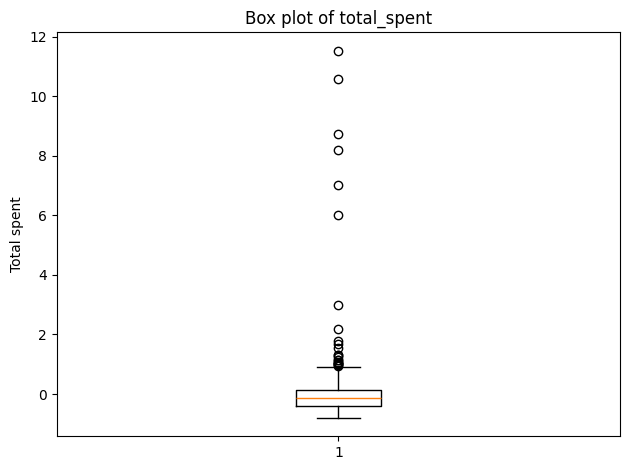

In [24]:
plt.boxplot(df_std['total_spent'])
plt.title("Box plot of total_spent")
plt.ylabel('Total spent')
plt.tight_layout()
plt.show()